# **Dectecting Outliers and Removing Them**

In [7]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
df = pd.read_csv('./dataset/placement.csv')

In [9]:
df.shape

(1000, 3)

In [10]:
df.head()

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0


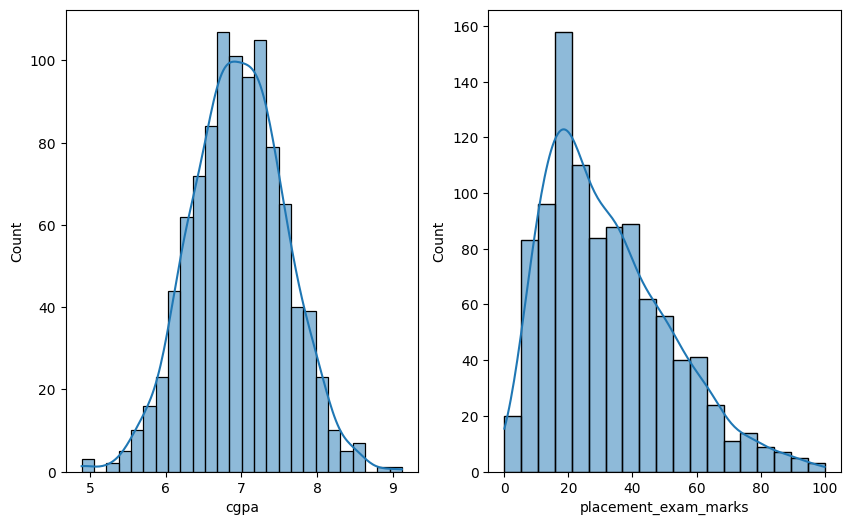

In [12]:
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
sns.histplot(df['cgpa'], kde=True)
plt.subplot(1, 2, 2)
sns.histplot(df['placement_exam_marks'], kde=True)

plt.show()

In [13]:
df['placement_exam_marks'].skew()

0.8356419499466834

In [14]:
df['cgpa'].skew()

-0.014529938929314918

In [15]:
df.describe()

,cgpa,placement_exam_marks,placed
count,1000.000000,1000.000000,1000.000000
mean,6.961240,32.225000,0.489000
std,0.615898,19.130822,0.500129
min,4.890000,0.000000,0.000000
25%,6.550000,17.000000,0.000000
50%,6.960000,28.000000,0.000000
75%,7.370000,44.000000,1.000000
max,9.120000,100.000000,1.000000


In [18]:
# Finding the boundary values
print("Highest allowed",df['cgpa'].mean() + 3*df['cgpa'].std())
print("Lowest allowed",df['cgpa'].mean() - 3*df['cgpa'].std())

Highest allowed 8.808933625397168
Lowest allowed 5.113546374602832


In [19]:
df[(df['cgpa']>8.80) | (df['cgpa']<5.11)]

,cgpa,placement_exam_marks,placed
485,4.92,44.0,1
995,8.87,44.0,1
996,9.12,65.0,1
997,4.89,34.0,0
999,4.90,10.0,1


### **Trimming Outliers**

In [20]:
new_df = df[(df['cgpa']>8.80) | (df['cgpa']<5.11)]
new_df

,cgpa,placement_exam_marks,placed
485,4.92,44.0,1
995,8.87,44.0,1
996,9.12,65.0,1
997,4.89,34.0,0
999,4.90,10.0,1


In [23]:
# Approach 2 
# Calculating the z-score
from scipy.stats import zscore
z_scores = zscore(df['cgpa'])
df['cgpa_zscore'] = z_scores

In [24]:
df.head()

,cgpa,placement_exam_marks,placed,cgpa_zscore
0,7.19,26.0,1,0.371611
1,7.46,38.0,1,0.810215
2,7.54,40.0,1,0.940171
3,6.42,8.0,1,-0.879222
4,7.23,17.0,0,0.436589


In [26]:
df[df['cgpa_zscore'] > 3]

,cgpa,placement_exam_marks,placed,cgpa_zscore
995,8.87,44.0,1,3.100701
996,9.12,65.0,1,3.506815


In [27]:
df[df['cgpa_zscore'] < -3]

,cgpa,placement_exam_marks,placed,cgpa_zscore
485,4.92,44.0,1,-3.315909
997,4.89,34.0,0,-3.364643
999,4.90,10.0,1,-3.348398


In [28]:
# Trimming
new_df1 = df[(df['cgpa_zscore'] > 3) | (df['cgpa_zscore'] < -3)]

In [29]:
new_df1

,cgpa,placement_exam_marks,placed,cgpa_zscore
485,4.92,44.0,1,-3.315909
995,8.87,44.0,1,3.100701
996,9.12,65.0,1,3.506815
997,4.89,34.0,0,-3.364643
999,4.90,10.0,1,-3.348398


## **Capping the Outliers**

In [30]:
upper_limit = df['cgpa'].mean() + 3*df['cgpa'].std()
lower_limit = df['cgpa'].mean() - 3*df['cgpa'].std()

In [31]:
lower_limit

5.113546374602832

In [32]:
df['cgpa'] = np.where(
    df['cgpa'] > upper_limit, upper_limit,
    np.where(
        df['cgpa'] < lower_limit, lower_limit,
        df['cgpa']
    )
)

In [33]:
df.shape

(1000, 4)

In [34]:
df['cgpa'].describe()

count    1000.000000
mean        6.961499
std         0.612688
min         5.113546
25%         6.550000
50%         6.960000
75%         7.370000
max         8.808934
Name: cgpa, dtype: float64